**Problem Statement**

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 5 marks
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

Modelling: 28 marks
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (9 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1. Based on these predictions, what are the insights? (5 marks)

Important Note: Please reflect on all that you have learned while working on this project. This step is critical in cementing all your concepts and closing the loop. Please write down your thoughts here.

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


# Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (5 Marks)

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the excel file

sheets = pd.read_excel('Election_Data.xlsx', sheet_name=None)

In [121]:
# import dataset

df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [122]:
df.shape

(1525, 10)

In [123]:
# check information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [124]:
df.duplicated().sum()

0

In [125]:
# check data description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [126]:
df.describe(include='object')

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [127]:
# Check the dimensions of Dataset

print('Dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataset has 1525 rows and 10 columns


In [128]:
# Check if there are any duplicated enetries in the dataset

print('The dataset has {} duplicate entries'.format(df.duplicated().sum()))

The dataset has 0 duplicate entries


In [129]:
# Check the information of each column/variable like no of not-null values and datatype of each variable

print('There are {} null values in the dataset as all the columns have {} non-null count.\
\n\nThere are {} columns with following datatypes :\n{}\n\n'.
      format(df.isnull().sum().sum(),df.shape[0],len(df.columns),df.dtypes.value_counts()))

There are 0 null values in the dataset as all the columns have 1525 non-null count.

There are 10 columns with following datatypes :
int64     8
object    2
dtype: int64




In [130]:
#Checking information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [131]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [132]:
# Check the object columns and relate for the types of values and counts 

for col in (df.select_dtypes(['object'])).columns:
    print('Column {} has {} unique values:\n{}'.format(col,len(df[col].unique()),df[col].value_counts(dropna=False)))
    print('===========================================================\n')

Column vote has 2 unique values:
Labour          1063
Conservative     462
Name: vote, dtype: int64

Column gender has 2 unique values:
female    812
male      713
Name: gender, dtype: int64



In [133]:
# check five-point summary

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [134]:
df.describe(include='object').transpose()

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


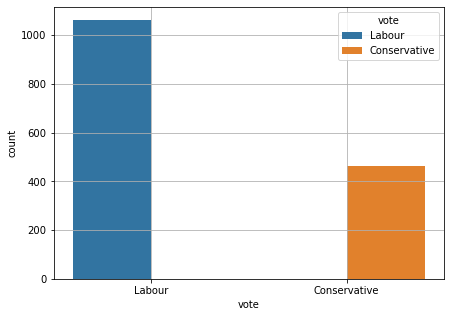

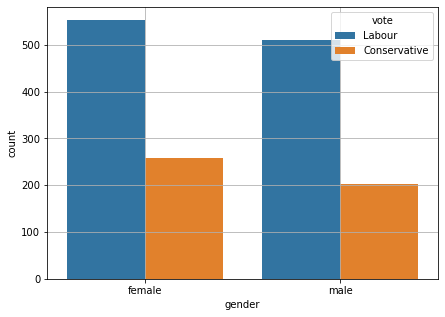

In [135]:
for i in df.columns: 
    if df[i].dtype == 'object': 
        plt.rcParams['figure.figsize'] = 7,5
        sns.countplot(x=df[i],hue =df['vote'])
        plt.grid()
        plt.show();

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


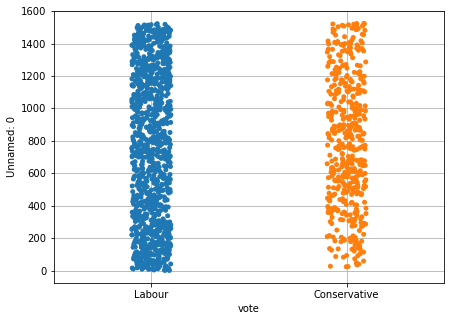

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


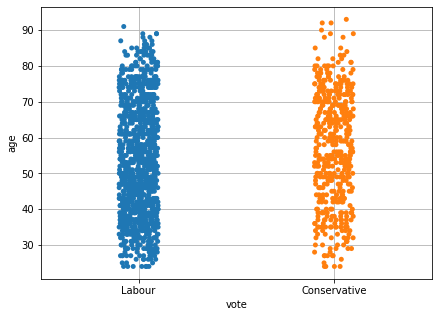

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


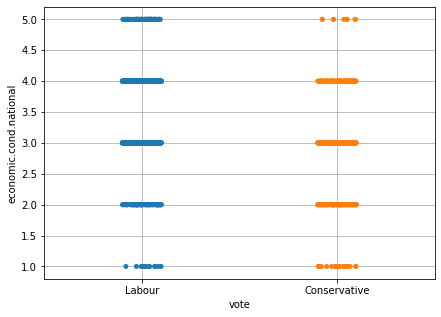

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


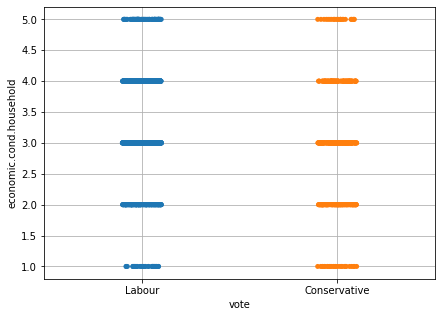

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


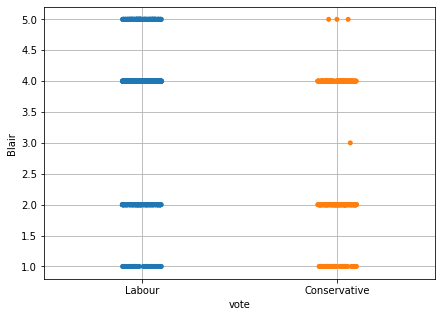

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


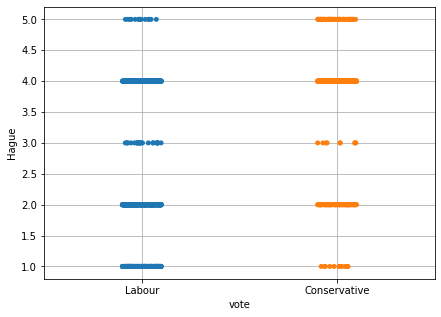

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


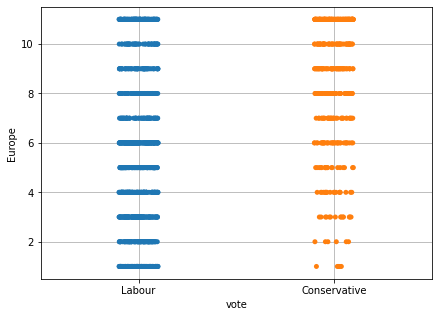

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


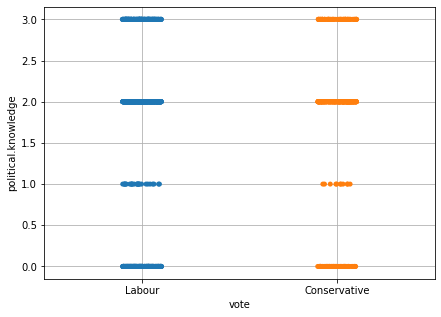

In [136]:
for i in (df.select_dtypes(['int64'])).columns:
    plt.rcParams['figure.figsize'] = 7,5
    sns.stripplot(df['vote'], df[i])
    plt.grid()
    plt.show()

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


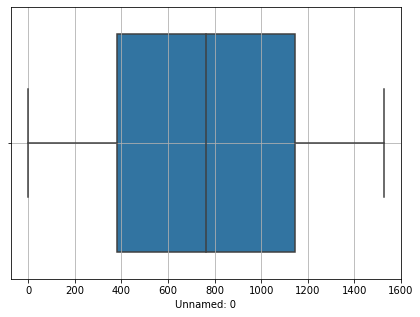

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


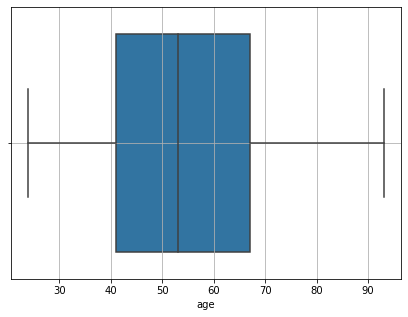

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


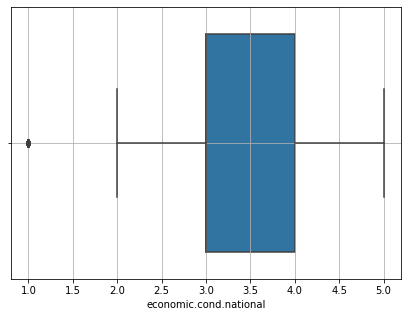

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


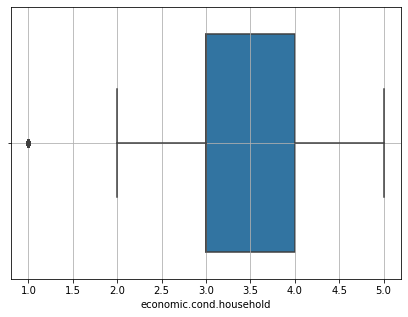

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


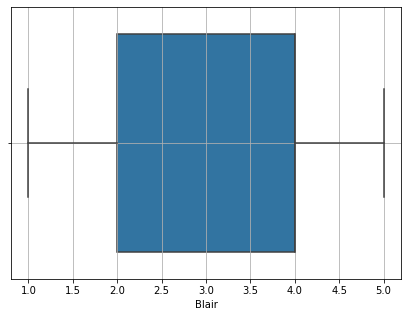

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


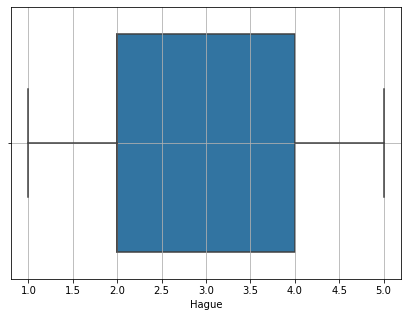

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


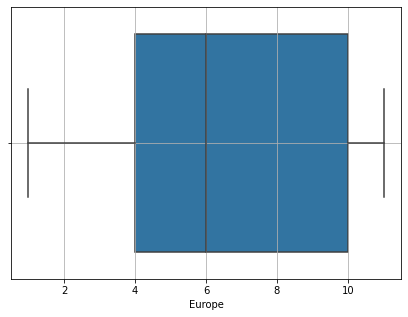

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


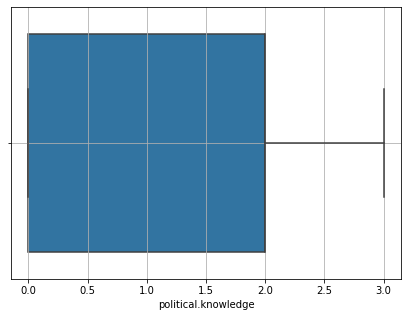

In [137]:
for i in df.columns: 
    if df[i].dtype == 'int64': 
        plt.rcParams['figure.figsize'] = 7,5
        sns.boxplot(df[i],whis=1.5)
        plt.grid()
        plt.show();

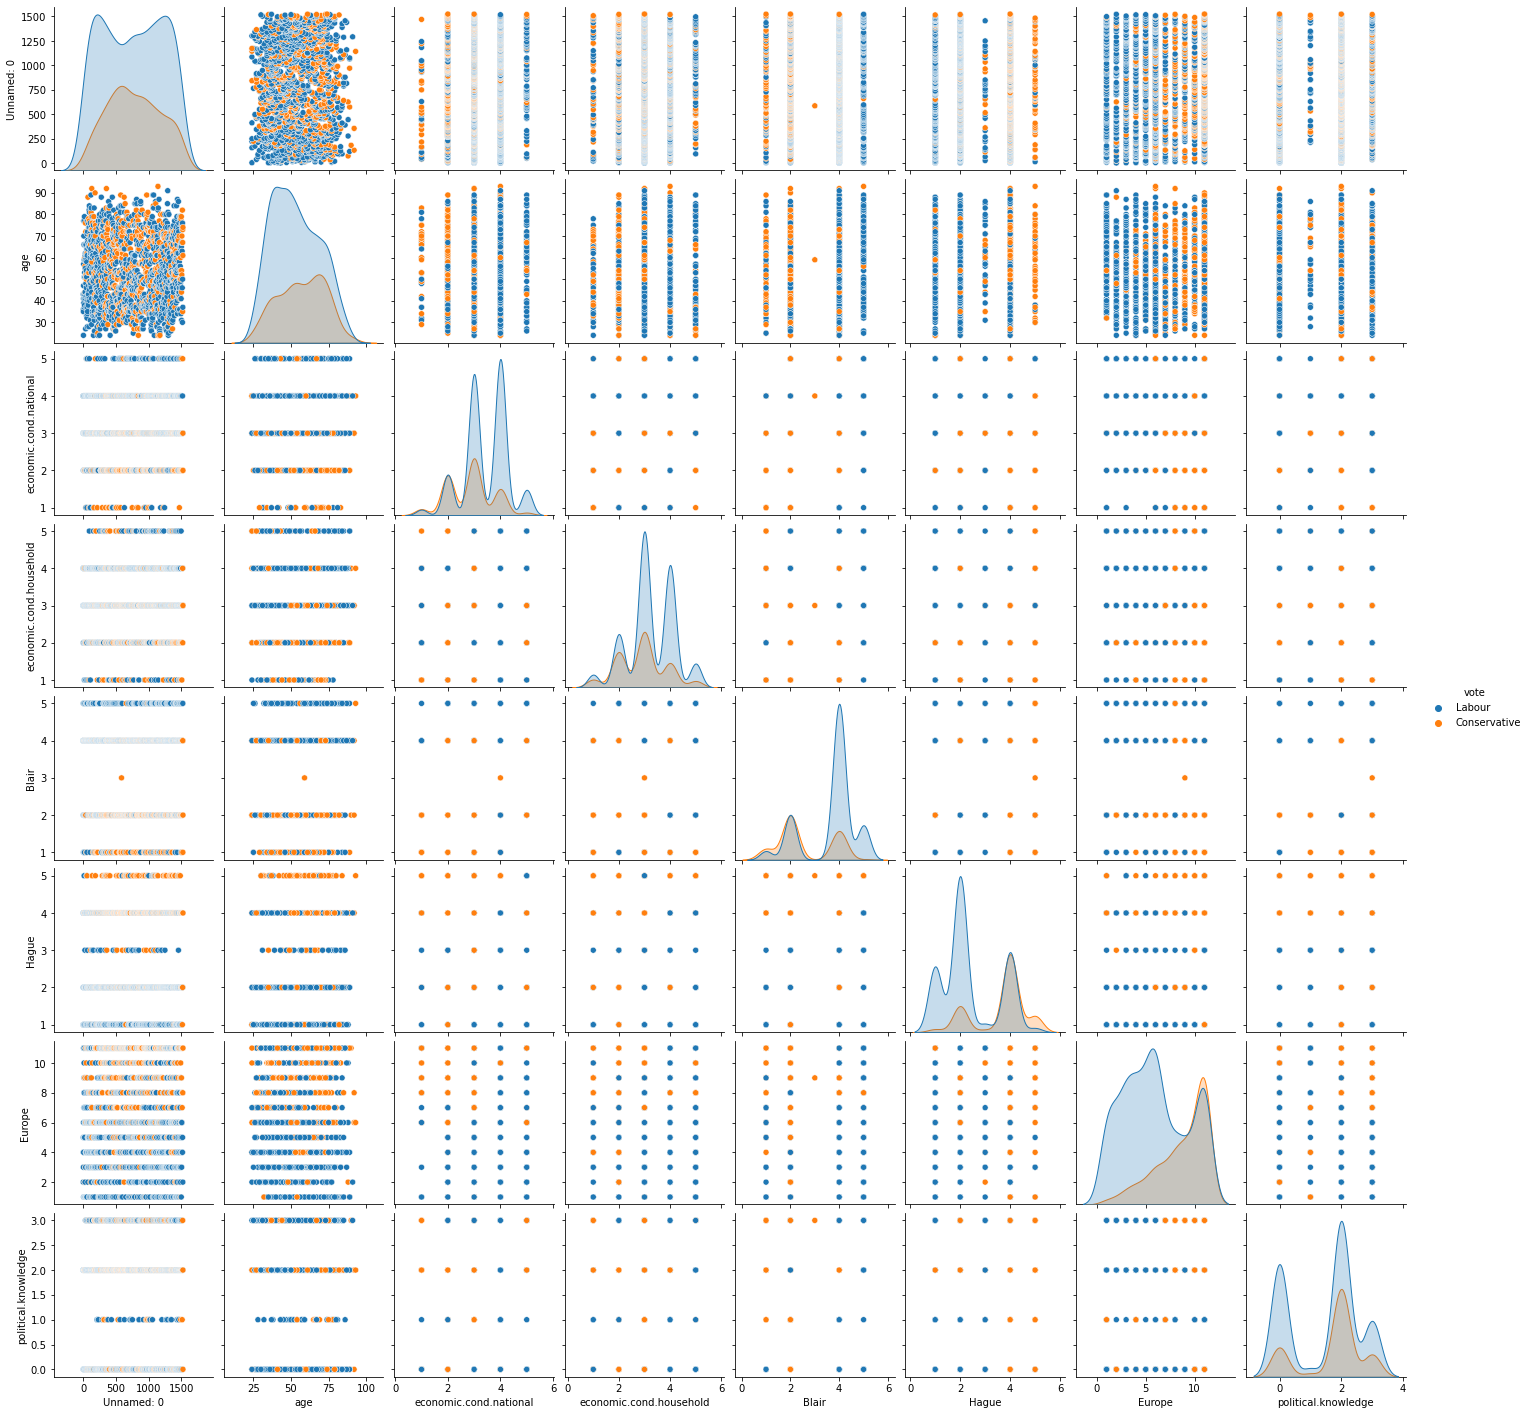

In [138]:
sns.pairplot(data=df,hue='vote')

# Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

In [139]:
df = df.drop('Unnamed: 0', axis=1) 

Text(1.0, 1.0, 'Distplot all')

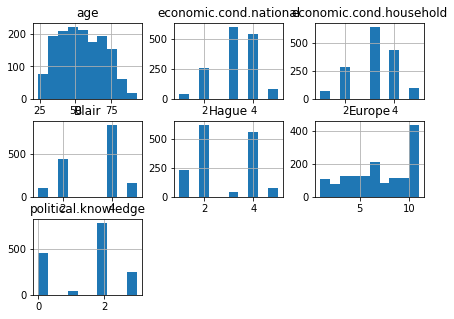

In [140]:
# Univariate analysis

histo1 = df.hist()
plt.title("Distplot all", fontsize='15', loc='right')

In [141]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

Text(0.5, 1.0, 'Histogram Age')

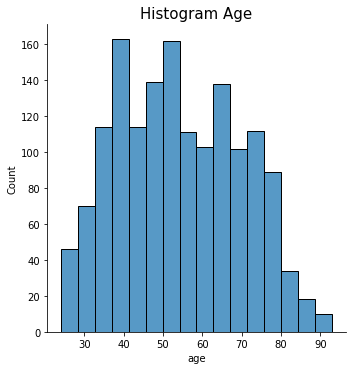

In [142]:
sns.displot(df['age'])
plt.title("Histogram Age", fontsize='15')

Text(0.5, 1.0, 'Boxplot All Variables')

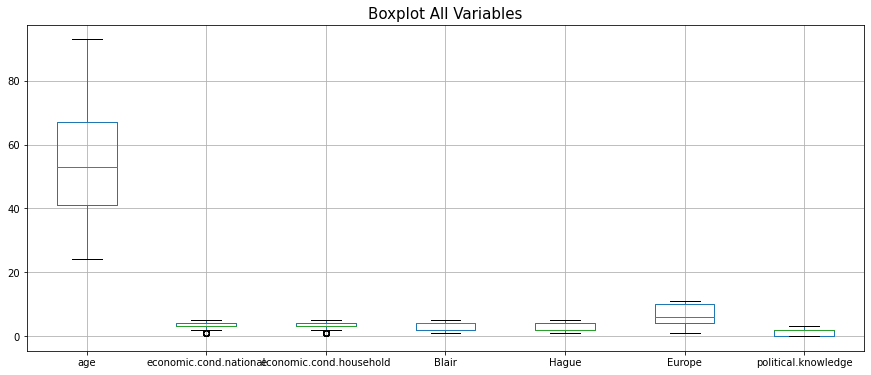

In [143]:
# checking outliers

plt.figure(figsize=(15,6))
df.boxplot()
plt.title("Boxplot All Variables", fontsize='15')

In [144]:
df['economic.cond.household'].value_counts(normalize=True)

3    0.424918
4    0.288525
2    0.183607
5    0.060328
1    0.042623
Name: economic.cond.household, dtype: float64

In [145]:
df['economic.cond.national'].value_counts(normalize=True)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic.cond.national, dtype: float64

There are outliers in two columns economic cond national and household, but we would not treat/remove them as:


    1.These are categorical variables by nature and in as a part of survey all categories are important.
    2.There numbers is very small (2% to 4% of the data) so they might not affect the overall predictions
    3.The techniques we will use for the predictions are robust to outliers.

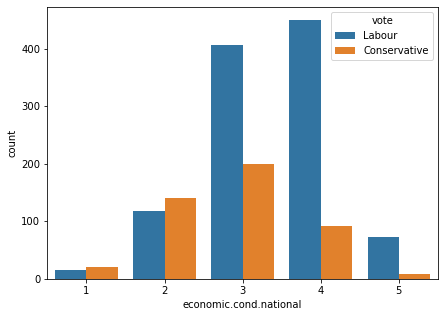

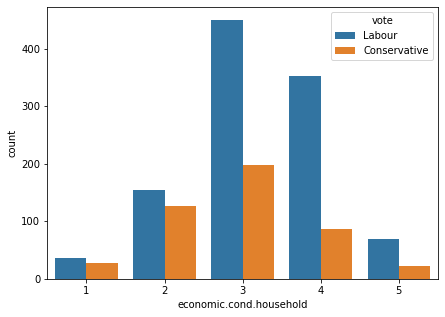

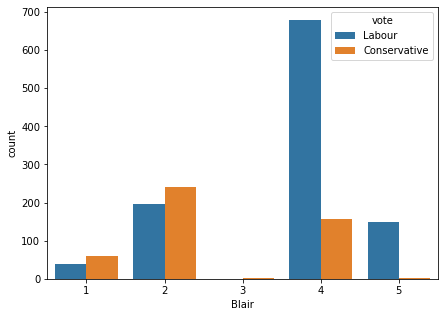

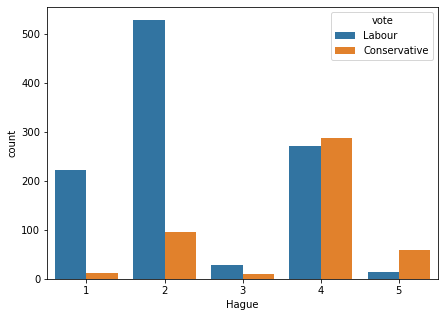

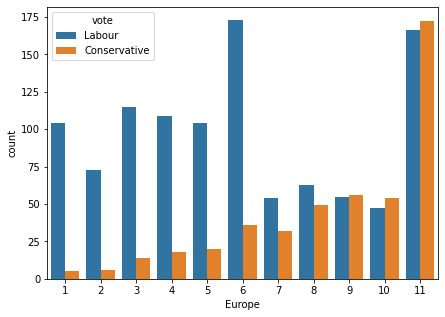

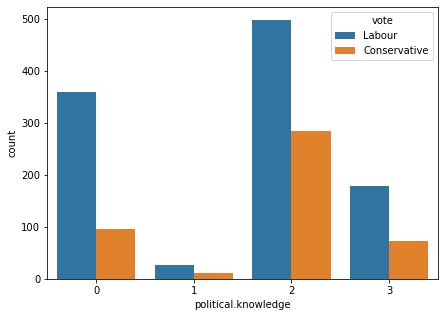

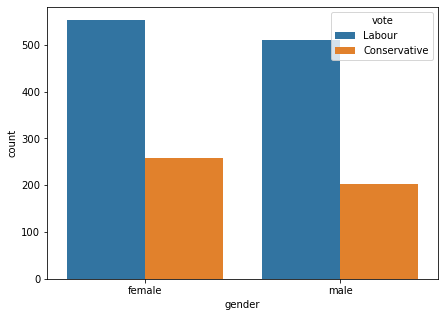

In [146]:
# bivariate analysis

for i in df.drop(['age','vote'], axis=1).columns:
    sns.countplot(x=df[i],hue=df['vote'])
    plt.show()

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blair', ylabel='count'>

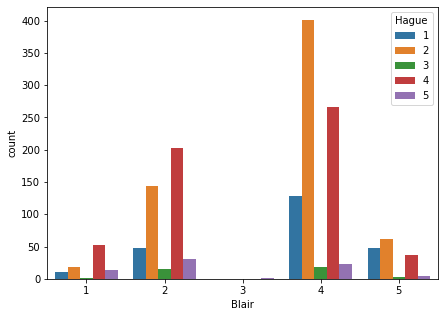

In [147]:
sns.countplot('Blair', data=df, hue='Hague')

# Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

In [148]:
# transform 'vote' variable to int type by label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['vote']= le.fit_transform(df['vote'])
df.vote.value_counts(normalize=True)

1    0.697049
0    0.302951
Name: vote, dtype: float64

In [149]:
# transform 'gender' variable to int type by label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df.gender.value_counts()

0    812
1    713
Name: gender, dtype: int64

Although all columns are single digit except Age and Europe which are also only in double digits, we may use the data without scaling. However, for our safety we wil scale the data before using it.

In [150]:
# separate X and y

X = df.drop('vote',axis=1) 
y = df.vote

# split data into test train in 70:30

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# scaling train and test

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)       # scaling original train data
X_test = scale.transform(X_test)             # scale original test data

In [151]:
y_test.value_counts(normalize=True)

1    0.716157
0    0.283843
Name: vote, dtype: float64

# Apply LDA (linear discriminant analysis).

In [161]:
df.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1


In [162]:
df2 = df.rename(columns = {'economic.cond.national': 'economic_cond_national', 'economic.cond.household': 'economic_cond_household','political.knowledge': 'political_knowledge'}, inplace = False)
df2.head(2)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1


In [154]:
# split data into test train in 70:30

from sklearn.model_selection import train_test_split
Train,Test = train_test_split(df2,test_size=0.3,random_state=1,stratify=df2['vote'])

X_train= Train.drop('vote',axis=1)
X_test= Test.drop('vote',axis=1)
y_train = Train['vote']
y_test= Test['vote']
# scaling train and test

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)       # scaling original train data
X_test = scale.transform(X_test)             # scale original test data

# LDA

In [163]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [164]:
LDA = LinearDiscriminantAnalysis()

In [165]:
model_1_LDA = LDA.fit(X_train, y_train)

In [166]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

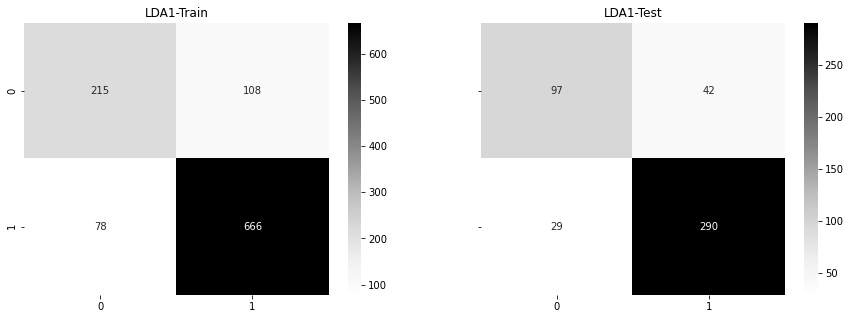

In [167]:
y_train_pred1 = model_1_LDA.predict(X_train)
y_test_pred1 = model_1_LDA.predict(X_test)


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA1-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA1-Test');

In [168]:
print('LDA1-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('LDA1-Test')
print(classification_report(y_test, y_test_pred1),'\n')

LDA1-Train
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

LDA1-Test
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



LDA1-Train AUC: 0.87642


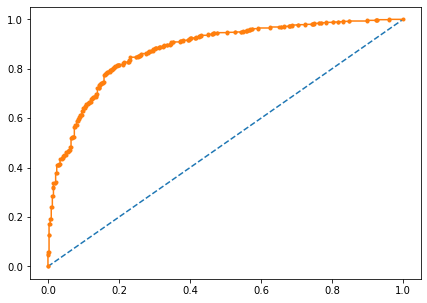

LDA1-Test AUC: 0.91493


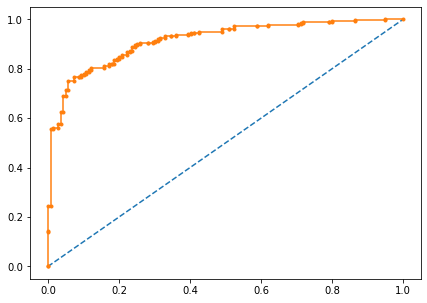

In [169]:
# AUC and ROC for the LDA 1

from sklearn.metrics import roc_curve, roc_auc_score

# calculate AUC
y_train_prob1 = model_1_LDA.predict_proba(X_train)
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('LDA1-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
y_test_prob1 = model_1_LDA.predict_proba(X_test)
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('LDA1-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)

In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### KNN without hyperparameter tuning

In [171]:
knn1 = knn.fit(X_train, y_train)

KNN1-Train
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       323
           1       0.89      0.91      0.90       744

    accuracy                           0.86      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.86      0.85      1067
 

KNN1-Test
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       139
           1       0.87      0.89      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458
 



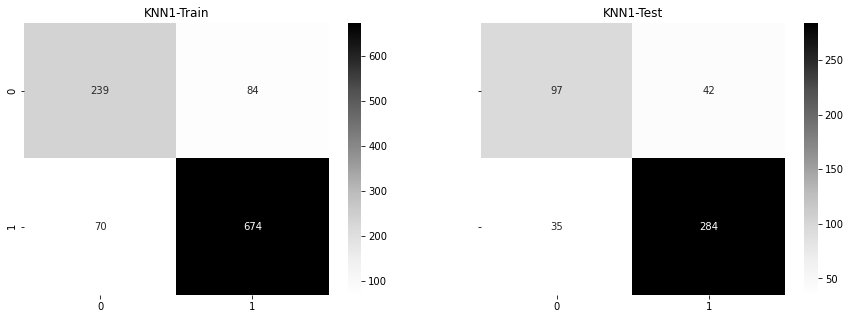

In [172]:
# predict y for both train and test data
y_train_pred1 = knn1.predict(X_train)
y_test_pred1 = knn1.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data
plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('KNN1-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('KNN1-Test');

# print classification report
print('KNN1-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('KNN1-Test')
print(classification_report(y_test, y_test_pred1),'\n')

KNN-Train AUC: 0.92569


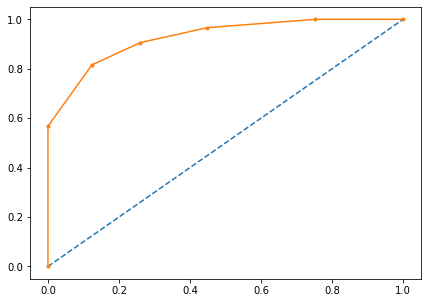

KNN1-Test AUC: 0.86599


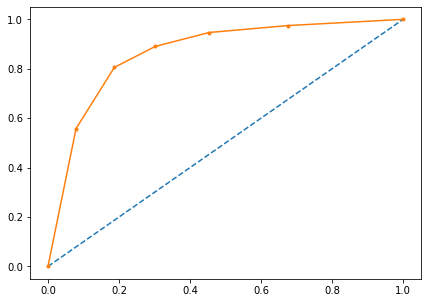

In [173]:
# AUC and ROC for the KNN 1

from sklearn.metrics import roc_curve, roc_auc_score

y_train_prob1 = knn1.predict_proba(X_train)
y_test_prob1 = knn1.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('KNN-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('KNN1-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [174]:
ac_scores_test = []
ac_scores_train = []

In [175]:
for k in range(2,30,4):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  #Evaluate Train Data
  score = knn.score(X_train,y_train)
  ac_scores_train.append(score)
  #Evaluate the test data
  scores = knn.score(X_test,y_test)
  ac_scores_test.append(scores)

In [176]:
ac_scores_train

[0.8678537956888472,
 0.8509840674789129,
 0.8369259606373008,
 0.8406747891283973,
 0.837863167760075,
 0.8397375820056232,
 0.8388003748828491]

In [177]:
misclassification_train = [ 1 - x for x in ac_scores_train ]
misclassification_test = [ 1 - x for x in ac_scores_test ]

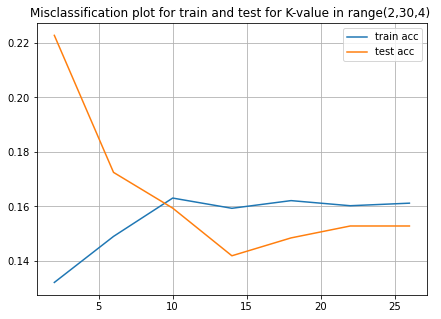

In [178]:
import matplotlib.pyplot as plt
plt.plot(range(2,30,4), misclassification_train, label = 'train acc')
plt.plot(range(2,30,4), misclassification_test, label = 'test acc')
plt.title("Misclassification plot for train and test for K-value in range(2,30,4) ")
plt.legend()
plt.grid()

In [179]:
# lets try knn withn kvalue =18, which is about least variance between train and test

knn2 = KNeighborsClassifier(n_neighbors=18)
knn2 = knn2.fit(X_train, y_train)

knn2-Train
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       323
           1       0.87      0.90      0.89       744

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.84      0.84      0.84      1067
 

knn2-Test
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       139
           1       0.88      0.91      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 



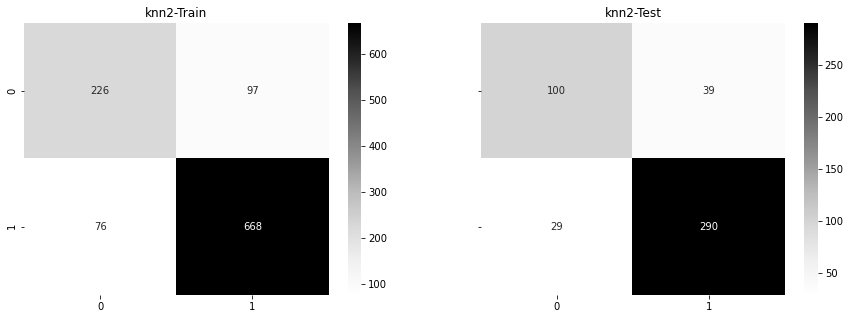

In [180]:
# predict y for both train and test data
y_train_pred1 = knn2.predict(X_train)
y_test_pred1 = knn2.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data
plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('knn2-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('knn2-Test');

# print classification report
print('knn2-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('knn2-Test')
print(classification_report(y_test, y_test_pred1),'\n')

Knn2-Train AUC: 0.90823


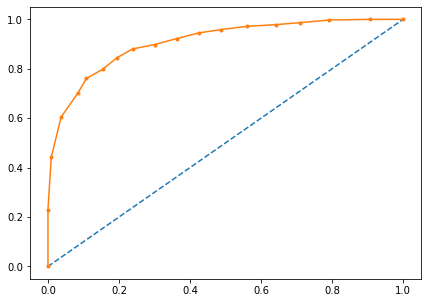

knn2-Test AUC: 0.90177


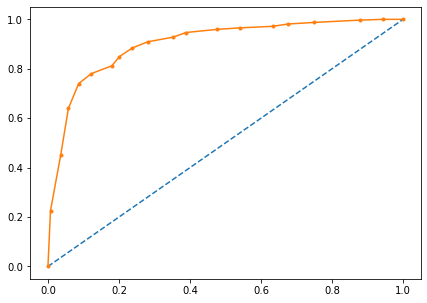

In [181]:
from sklearn.metrics import roc_curve, roc_auc_score

y_train_prob1 = knn2.predict_proba(X_train)
y_test_prob1 = knn2.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('Knn2-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('knn2-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### KNN with hyperparameter tuning

In [182]:
params = {'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size' : list(range(5,50,5)),
          'p' : [1,2,3,4,5],
          'n_neighbors' : [10,13,15,17,19]
          }

In [183]:
from sklearn.model_selection import GridSearchCV

params = {'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size' : list(range(3,30,3)),
          'p' : [1,2,3,4,5],
          'n_neighbors' : [17,19]
          }

knn3 = GridSearchCV(KNeighborsClassifier() , param_grid = params , refit = True , cv = 3 )

knn3 = knn3.fit(X_train,y_train)

knn3.best_params_

{'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 19, 'p': 2}

In [184]:
knn3 = knn3.fit(X_train,y_train)

In [185]:
train_acc = accuracy_score(y_train, knn3.predict(X_train))
test_acc = accuracy_score(y_test, knn3.predict(X_test))

print(train_acc, test_acc)

0.8350515463917526 0.8471615720524017


Knn3-Train
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       323
           1       0.86      0.91      0.88       744

    accuracy                           0.84      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 

Knn3-Test
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       139
           1       0.87      0.92      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.84      0.85      0.84       458
 



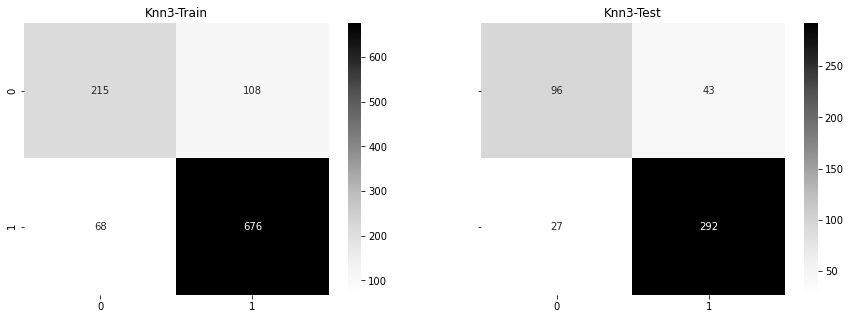

In [186]:
y_train_pred1 = knn3.predict(X_train)
y_test_pred1 = knn3.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Knn3-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Knn3-Test');

# print classification matrix
print('Knn3-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('Knn3-Test')
print(classification_report(y_test, y_test_pred1),'\n')

Knn3-Train AUC: 0.90680


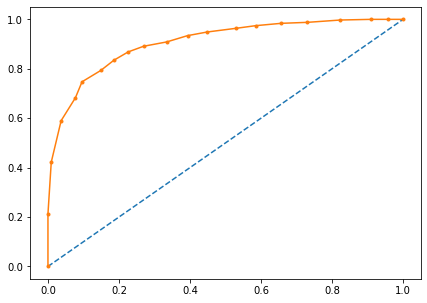

Knn3-Test AUC: 0.90238


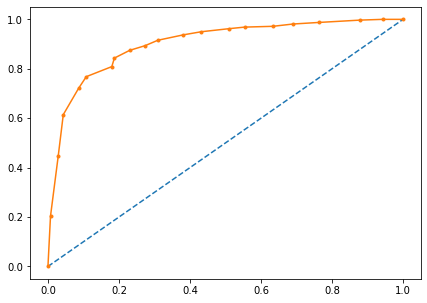

In [187]:
# AUC and ROC for the KNN 3

from sklearn.metrics import roc_curve, roc_auc_score

y_train_prob1 = knn3.predict_proba(X_train)
y_test_prob1 = knn3.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('Knn3-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('Knn3-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [188]:
from sklearn.model_selection import GridSearchCV

params = {'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size' : list(range(1,15,3)),
          'p' : [2,3,4],
          'n_neighbors' : [15,16,17]
          }

knn4 = GridSearchCV(KNeighborsClassifier() , param_grid = params , refit = True , cv = 3 )

knn4 = knn4.fit(X_train,y_train)

knn4.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 16, 'p': 2}

In [189]:
train_acc = accuracy_score(y_train, knn4.predict(X_train))
test_acc = accuracy_score(y_test, knn4.predict(X_test))

print(train_acc, test_acc)  # notice no change in acc

0.8416119962511716 0.8580786026200873


### Naive Bayes

In [190]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [191]:
NB_model = GaussianNB()

In [192]:
NB_model.fit(X_train, y_train)

GaussianNB()

NB_model-Train
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       323
           1       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067
 

NB_model-Test
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458
 



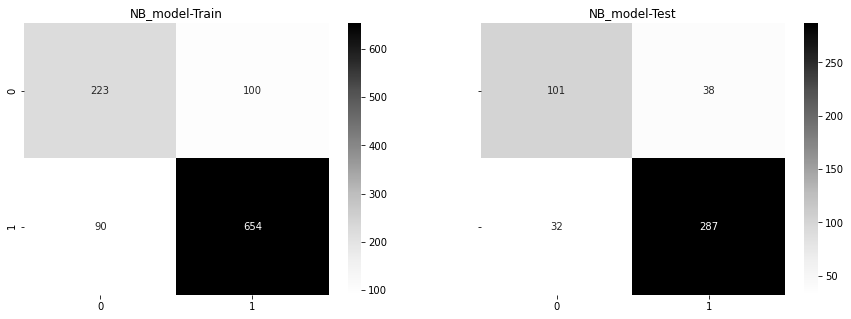

In [193]:
y_train_pred1 = NB_model.predict(X_train)
y_test_pred1 = NB_model.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('NB_model-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('NB_model-Test');

# print classification matrix
print('NB_model-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('NB_model-Test')
print(classification_report(y_test, y_test_pred1),'\n')

NB1-Train AUC: 0.87436


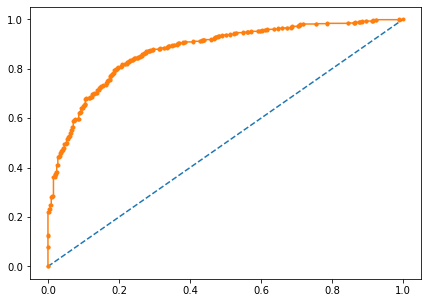

NB1-Test AUC: 0.90999


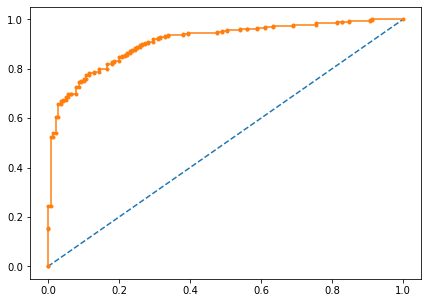

In [194]:
# AUC and ROC for the KNN 1

from sklearn.metrics import roc_curve, roc_auc_score

y_train_prob1 = NB_model.predict_proba(X_train)
y_test_prob1 = NB_model.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('NB1-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('NB1-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [195]:
from sklearn.model_selection import cross_val_score

In [196]:
train_acc = cross_val_score(NB_model,X_train,y_train,cv=2,scoring='accuracy')
test_acc = cross_val_score(NB_model,X_test,y_test,cv=2,scoring='accuracy')
print('Train-Test Accuracy Score after two fold Cross Validation')
print('\nTrain-Acc',train_acc,'\nTest-Acc ',test_acc)

Train-Test Accuracy Score after two fold Cross Validation

Train-Acc [0.8164794  0.83489681] 
Test-Acc  [0.86026201 0.79912664]


In [197]:
train_roc_auc = cross_val_score(NB_model,X_train,y_train,cv=2,scoring='roc_auc')
test_roc_auc = cross_val_score(NB_model,X_test,y_test,cv=2,scoring='roc_auc')
print('Train-Test ROC-AUC after two fold Cross Validation')
print('\nTrain-roc_auc',train_roc_auc,'\nTest-roc_auc ',test_roc_auc)

Train-Test ROC-AUC after two fold Cross Validation

Train-roc_auc [0.86944942 0.87602685] 
Test-roc_auc  [0.89619565 0.89362084]


In [198]:
train_acc = cross_val_score(NB_model,X_train,y_train,cv=3,scoring='accuracy')
test_acc = cross_val_score(NB_model,X_test,y_test,cv=3,scoring='accuracy')
print('Train-Test Accuracy Score after three fold Cross Validation')
print('\nTrain-Acc',train_acc,'\nTest-Acc ',test_acc)

Train-Test Accuracy Score after three fold Cross Validation

Train-Acc [0.81741573 0.82022472 0.83943662] 
Test-Acc  [0.8496732  0.81045752 0.86184211]


In [199]:
train_roc_auc = cross_val_score(NB_model,X_train,y_train,cv=3,scoring='roc_auc')
test_roc_auc = cross_val_score(NB_model,X_test,y_test,cv=3,scoring='roc_auc')
print('Train-Test ROC-AUC after three fold Cross Validation')
print('\nTrain-roc_auc',train_roc_auc,'\nTest-roc_auc ',test_roc_auc)

Train-Test ROC-AUC after three fold Cross Validation

Train-roc_auc [0.86284722 0.86790621 0.88841574] 
Test-roc_auc  [0.88175538 0.90726616 0.91550451]


In [200]:
train_acc = cross_val_score(NB_model,X_train,y_train,cv=4,scoring='accuracy')
test_acc = cross_val_score(NB_model,X_test,y_test,cv=4,scoring='accuracy')
print('Train-Test Accuracy Score after four fold Cross Validation')
print('\nTrain-Acc',train_acc,'\nTest-Acc ',test_acc)

Train-Test Accuracy Score after four fold Cross Validation

Train-Acc [0.82397004 0.80898876 0.82397004 0.82330827] 
Test-Acc  [0.85217391 0.86956522 0.78947368 0.85964912]


In [201]:
train_roc_auc = cross_val_score(NB_model,X_train,y_train,cv=4,scoring='roc_auc')
test_roc_auc = cross_val_score(NB_model,X_test,y_test,cv=4,scoring='roc_auc')
print('Train-Test ROC-AUC after four fold Cross Validation')
print('\nTrain-roc_auc',train_roc_auc,'\nTest-roc_auc ',test_roc_auc)

Train-Test ROC-AUC after four fold Cross Validation

Train-roc_auc [0.87846807 0.85702907 0.86598965 0.88353495] 
Test-roc_auc  [0.88928571 0.93678571 0.89448529 0.90415913]


# Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (9 marks)

In [202]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [203]:
ADB_model = AdaBoostClassifier(random_state = 1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

ADB_model-Train
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       323
           1       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

ADB_model-Test
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       139
           1       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458
 



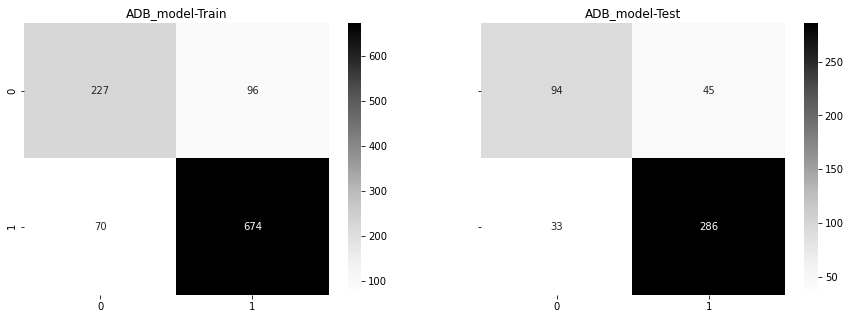

In [204]:
y_train_pred1 = ADB_model.predict(X_train)
y_test_pred1 = ADB_model.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('ADB_model-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('ADB_model-Test');

# print classification matrix
print('ADB_model-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('ADB_model-Test')
print(classification_report(y_test, y_test_pred1),'\n')

ADB-Train AUC: 0.89941


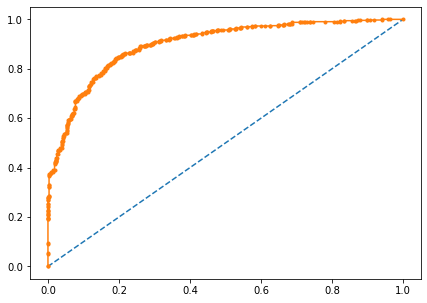

ADB-Test AUC: 0.90629


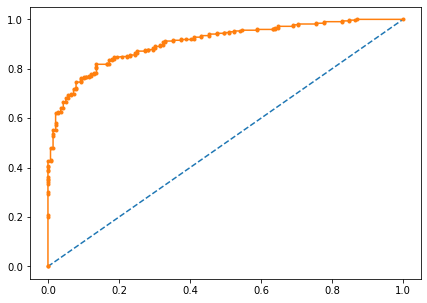

In [205]:
from sklearn.metrics import roc_curve, roc_auc_score

y_train_prob1 = ADB_model.predict_proba(X_train)
y_test_prob1 = ADB_model.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('ADB-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('ADB-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [206]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

ADB_model2 = AdaBoostClassifier(n_estimators=10)

In [207]:
ADB_model2 = AdaBoostClassifier(n_estimators=10)
ADB_model2.fit(X_train, y_train)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=25, n_repeats=5, random_state=1)
Train_acc = cross_val_score(ADB_model2, X_train, y_train, scoring='accuracy',
                            cv=cv, n_jobs=-1, error_score='raise')
Test_acc = cross_val_score(ADB_model2, X_test, y_test, scoring='accuracy',
                            cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Train Accuracy: ',np.mean(Train_acc))
print('Test Accuracy: ',np.mean(Test_acc))

Train Accuracy:  0.8258959025470654
Test Accuracy:  0.8391812865497076


In [208]:
train_roc_auc = cross_val_score(ADB_model2, X_train, y_train, scoring='roc_auc',
                            cv=cv, n_jobs=-1, error_score='raise')
test_roc_auc = cross_val_score(ADB_model2, X_test, y_test, scoring='roc_auc',
                            cv=cv, n_jobs=-1, error_score='raise')

print('Train ROC-AUC: ',np.mean(train_roc_auc))
print('Test ROC_AUC: ',np.mean(test_roc_auc))

Train ROC-AUC:  0.8682915119363396
Test ROC_AUC:  0.9018051282051283


In [209]:
ADB_model4 = AdaBoostClassifier(n_estimators=6)
ADB_model4.fit(X_train,y_train)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=70, n_repeats=5, random_state=50)
Train_acc = cross_val_score(ADB_model4, X_train, y_train, scoring='accuracy',
                            cv=cv, n_jobs=-1, error_score='raise')
Test_acc = cross_val_score(ADB_model4, X_test, y_test, scoring='accuracy',
                            cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: ',np.mean(Train_acc))
print('Accuracy: ',np.mean(Test_acc))

Accuracy:  0.8179285714285713
Accuracy:  0.8490476190476189


In [210]:
ADB_model4 = AdaBoostClassifier(n_estimators=6)
ADB_model4.fit(X_train,y_train)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=70, n_repeats=5, random_state=50)
Train_acc = cross_val_score(ADB_model4, X_train, y_train, scoring='accuracy',
                            cv=cv, n_jobs=-1, error_score='raise')
Test_acc = cross_val_score(ADB_model4, X_test, y_test, scoring='accuracy',
                            cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Train Accuracy: ',np.mean(Train_acc))
print('Test Accuracy: ',np.mean(Test_acc))

Train Accuracy:  0.8179285714285713
Test Accuracy:  0.8490476190476189


In [211]:
train_roc_auc = cross_val_score(ADB_model4, X_train, y_train, scoring='roc_auc',
                            cv=cv, n_jobs=-1, error_score='raise')
test_roc_auc = cross_val_score(ADB_model4, X_test, y_test, scoring='roc_auc',
                            cv=cv, n_jobs=-1, error_score='raise')

print('Train ROC-AUC: ',np.mean(train_roc_auc))
print('Test ROC_AUC: ',np.mean(test_roc_auc))

Train ROC-AUC:  0.8646168831168831
Test ROC_AUC:  0.9048928571428573


## Gradient Boosting

In [212]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 12,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

GB_model-Train
              precision    recall  f1-score   support

           0       0.86      0.48      0.62       323
           1       0.81      0.97      0.88       744

    accuracy                           0.82      1067
   macro avg       0.83      0.72      0.75      1067
weighted avg       0.83      0.82      0.80      1067
 

GB_model-Test
              precision    recall  f1-score   support

           0       0.86      0.50      0.64       139
           1       0.82      0.97      0.89       319

    accuracy                           0.83       458
   macro avg       0.84      0.73      0.76       458
weighted avg       0.83      0.83      0.81       458
 



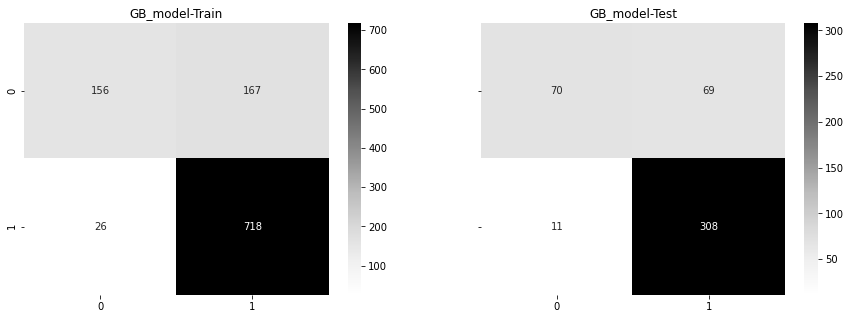

In [213]:
y_train_pred1 = gbcl.predict(X_train)
y_test_pred1 = gbcl.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('GB_model-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('GB_model-Test');

# print classification matrix
print('GB_model-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('GB_model-Test')
print(classification_report(y_test, y_test_pred1),'\n')

GB-Train AUC: 0.90428


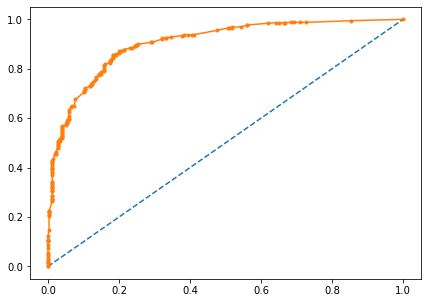

GB-Test AUC: 0.90697


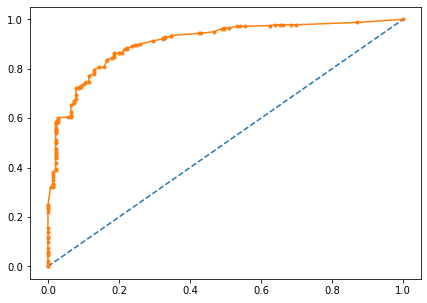

In [214]:
y_train_prob1 = gbcl.predict_proba(X_train)
y_test_prob1 = gbcl.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('GB-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('GB-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [215]:
gbcl = GradientBoostingClassifier(n_estimators = 101 , random_state = 1)

In [216]:
# !pip install imbalanced-learn

In [217]:
# Bagging Technique

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bgcl1 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl1 = bgcl1.fit(X_train, y_train)

## Bagging

In [218]:
# Bagging Technique

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bgcl1 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=150,random_state=1)
bgcl1 = bgcl1.fit(X_train, y_train)

BAG_model-Train
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       323
           1       0.97      0.99      0.98       744

    accuracy                           0.97      1067
   macro avg       0.97      0.96      0.97      1067
weighted avg       0.97      0.97      0.97      1067
 

BAG_model-Test
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



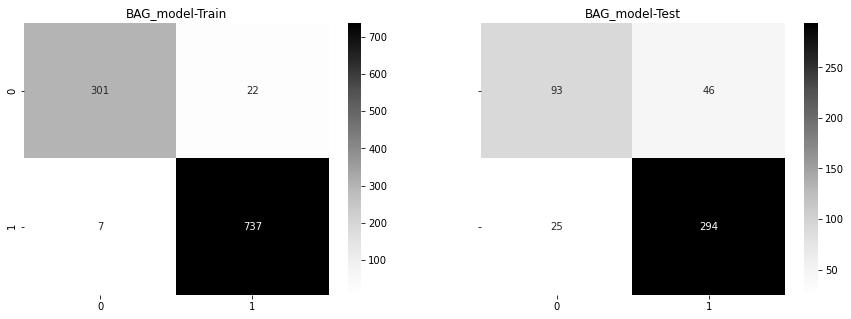

In [219]:
y_train_pred1 = bgcl1.predict(X_train)
y_test_pred1 = bgcl1.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('BAG_model-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('BAG_model-Test');

# print classification matrix
print('BAG_model-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('BAG_model-Test')
print(classification_report(y_test, y_test_pred1),'\n')

BAG-Train AUC: 0.99732


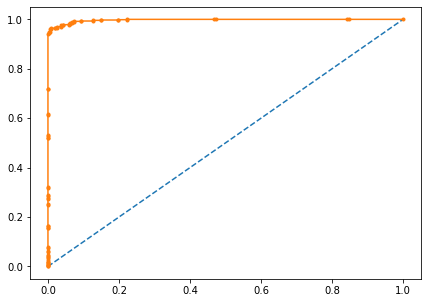

BAG-Test AUC: 0.91750


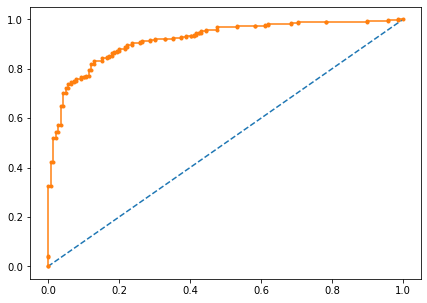

In [220]:
y_train_prob1 = bgcl1.predict_proba(X_train)
y_test_prob1 = bgcl1.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('BAG-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('BAG-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [221]:
# Bagging Technique

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bgcl2 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
    max_features=5,max_samples=120, random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl2 = bgcl2.fit(X_train, y_train)

train_acc = accuracy_score(y_train, bgcl2.predict(X_train))
test_acc = accuracy_score(y_test, bgcl2.predict(X_test))

print(train_acc, test_acc)

0.8509840674789129 0.8362445414847162


BAG_model-Train
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       323
           1       0.85      0.96      0.90       744

    accuracy                           0.85      1067
   macro avg       0.85      0.78      0.81      1067
weighted avg       0.85      0.85      0.84      1067
 

BAG_model-Test
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       139
           1       0.84      0.95      0.89       319

    accuracy                           0.84       458
   macro avg       0.84      0.76      0.79       458
weighted avg       0.84      0.84      0.83       458
 



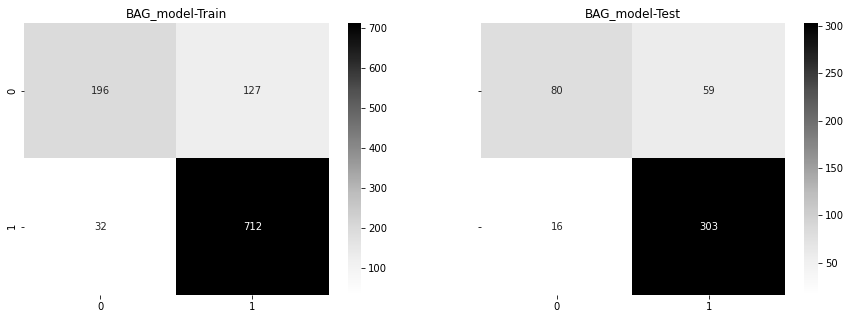

In [222]:
y_train_pred1 = bgcl2.predict(X_train)
y_test_pred1 = bgcl2.predict(X_test)

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,5))
#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('BAG_model-Train')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_pred1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('BAG_model-Test');

# print classification matrix
print('BAG_model-Train')
print(classification_report(y_train, y_train_pred1),'\n')

print('BAG_model-Test')
print(classification_report(y_test, y_test_pred1),'\n')

BAG-Train AUC: 0.92314


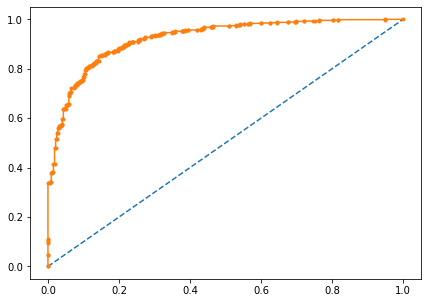

BAG-Test AUC: 0.91759


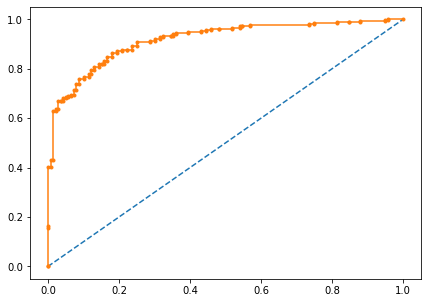

In [223]:
y_train_prob1 = bgcl2.predict_proba(X_train)
y_test_prob1 = bgcl2.predict_proba(X_test)

# calculate AUC
auc1 = roc_auc_score(y_train,y_train_prob1[:, 1])      #keeping only the probabilities for the desired class outcome
print('BAG-Train AUC: %.5f' % auc1)
# # calculate roc curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob1[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc1 = roc_auc_score(y_test,y_test_prob1[:, 1])      #keeping only the probabilities for the desired class outcome

print('BAG-Test AUC: %.5f' % auc1)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob1[:, 1]) #keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()